In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = pd.read_csv('household_power_consumption.txt', sep=';', low_memory=False)

In [14]:
number_of_entries_per_day = dict()
for day in data.Date:
    if day in number_of_entries_per_day:
        number_of_entries_per_day[day] +=1
    else:
        number_of_entries_per_day[day] = 1

frequences = number_of_entries_per_day.values()
min(frequences), max(frequences)

(396, 1440)

In [15]:
days_in_a_year = {2006: (0), 2007:(0), 2008: (0), 2009:(0), 2010:(0)}

for day in number_of_entries_per_day:
    year = int(day[-4:])
    days_in_a_year[year] += 1

days_in_a_year

{2006: 16, 2007: 365, 2008: 366, 2009: 365, 2010: 330}

In [16]:
data["Date"] = pd.to_datetime(data["Date"])
data["Time"] = pd.to_timedelta(data["Time"])
data["Timestamp"] = data["Date"] + data["Time"]

/usr/local/lib/python3.8/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.8/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.8/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/usr/local/lib/python3.8/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19/12/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime

In [17]:
# Missing values as NaN
data = data.replace('?', np.NaN)

In [18]:
# Conversion to numerical values
cols = list(data.columns)
cols.remove('Date')
cols.remove('Time')
cols.remove('Timestamp')
cols.remove('Sub_metering_3')

In [19]:
for col in cols:
    data[col] = pd.to_numeric(data[col])

# Check missing values
missing_values = data.isnull().sum()

# Display missing values count
print(missing_values)

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Timestamp                    0
dtype: int64


In [20]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    data[col].fillna(data[col].mean(), inplace=True)


In [21]:
for col in cols:
    data[col] = pd.to_numeric(data[col])
data.dtypes

Date                      datetime64[ns]
Time                     timedelta64[ns]
Global_active_power              float64
Global_reactive_power            float64
Voltage                          float64
Global_intensity                 float64
Sub_metering_1                   float64
Sub_metering_2                   float64
Sub_metering_3                   float64
Timestamp                 datetime64[ns]
dtype: object

# **Prophet**

In [22]:
pip install prophet

Defaulting to user installation because normal site-packages is not writeable
  Using cached cmdstanpy-0.9.68-py3-none-any.whl (49 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.8/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.8/dist-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


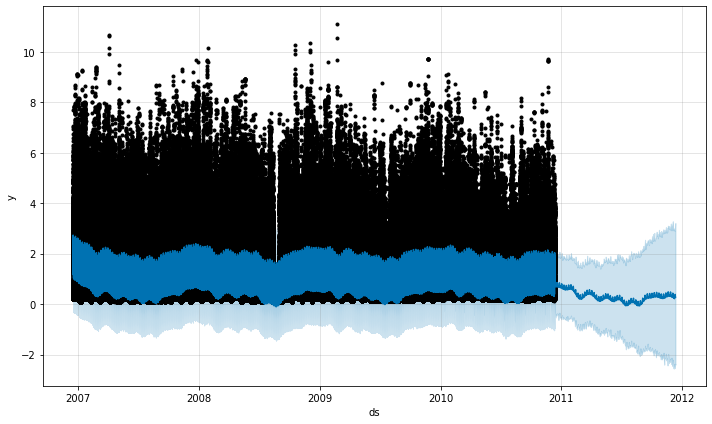

Mean Squared Error (Prophet): 0.8473123701997276
Root Mean Squared Error (Prophet): 0.9204957198160824
R-squared (Prophet): 0.2324209803926468


In [23]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame with 'Timestamp' as the index and 'Global_active_power' as the target column
target_column = 'Global_active_power'

# Prepare data for Prophet
prophet_data = data.reset_index()[['Timestamp', target_column]]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Make future dataframe for predictions
future = model_prophet.make_future_dataframe(periods=365)  # Assuming one year forecast

# Generate predictions
forecast = model_prophet.predict(future)

# Plot the forecast
fig = model_prophet.plot(forecast)
plt.show()

# Evaluate the model using additional measures
actual_values = prophet_data['y'].values
predicted_values = forecast['yhat'][:-365].values  # Exclude the forecasted part for evaluation

mse_prophet = mean_squared_error(actual_values, predicted_values)
rmse_prophet = sqrt(mse_prophet)
r2_prophet = r2_score(actual_values, predicted_values)

print(f'Mean Squared Error (Prophet): {mse_prophet}')
print(f'Root Mean Squared Error (Prophet): {rmse_prophet}')
print(f'R-squared (Prophet): {r2_prophet}')
